# Import Modules & Settings

In [163]:
# Import libraries 

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Import Datasets

In [3]:
# Import CSV dataset into Python 

coles_df = pd.read_csv('Cleaned_all_39000000_rows.csv')
print(coles_df)

          actorId         verb   type       activity  \
0               0    completed  event     activities   
1               1    completed  event     activities   
2               2    completed  event     activities   
3               3    completed  event     activities   
4               4    completed  event     activities   
...           ...          ...    ...            ...   
39185077    72205  experienced    NaN       learning   
39185078    72205  initialized    NaN           home   
39185079    11218  experienced    NaN        profile   
39185080    11218  experienced    NaN  notifications   
39185081    10846      removed  alert  notifications   

                                     ancestors  duration  completion  \
0                               ['activities']         0         1.0   
1                               ['activities']         0         1.0   
2                               ['activities']         0         1.0   
3                               ['activ

In [4]:
# Import dictionaries into Python

actorid = pd.read_csv('actorid_dictionary.csv')
print(actorid)

timezoneid = pd.read_csv('timezone_dictionary.csv')
print(timezoneid)

                                              Unnamed: 0      0
0      account|https://coles.clearlrs.com|3fa55218f73...      0
1      account|https://coles.clearlrs.com|9268e85c723...      1
2      account|https://coles.clearlrs.com|7b027350-6f...      2
3      account|https://coles.clearlrs.com|9d8979bad64...      3
4      account|https://coles.clearlrs.com|591d8d7660a...      4
...                                                  ...    ...
22375  account|https://coles.clearlrs.com|498cd9cfde8...  22375
22376  account|https://coles.clearlrs.com|25fded6f4ac...  22376
22377  account|https://coles.clearlrs.com|32dfb2f0-ee...  22377
22378  account|https://coles.clearlrs.com|84270fd1f68...  22378
22379  account|https://coles.clearlrs.com|6d86aeac5ad...  22379

[22380 rows x 2 columns]
            Unnamed: 0  0
0  Australia/Melbourne  0
1   Australia/Brisbane  1
2     Australia/Sydney  2
3      Australia/Perth  3
4     Australia/Darwin  4
5   Australia/Adelaide  5
6     Australia/Hobart  

# Data Cleansing

## Remove rows with ancestors - just 'home'

In [5]:
## Remove rows with ancestors - just 'home'
coles_df.drop(coles_df[coles_df['ancestors'] == "['home']"].index, inplace=True)
coles_df = coles_df.reset_index(drop=True)
print(coles_df)

          actorId         verb   type       activity  \
0               0    completed  event     activities   
1               1    completed  event     activities   
2               2    completed  event     activities   
3               3    completed  event     activities   
4               4    completed  event     activities   
...           ...          ...    ...            ...   
33892239    15859    completed    NaN     activities   
33892240    72205  experienced    NaN       learning   
33892241    11218  experienced    NaN        profile   
33892242    11218  experienced    NaN  notifications   
33892243    10846      removed  alert  notifications   

                                     ancestors  duration  completion  \
0                               ['activities']         0         1.0   
1                               ['activities']         0         1.0   
2                               ['activities']         0         1.0   
3                               ['activ

## Duration from milliseconds -> seconds

In [6]:
## Convert duration from milliseconds to seconds
def duration_conversion(milliseconds):
    if milliseconds == 0:
        return milliseconds
    else:
        return milliseconds//60

def duration_new_column(df, column):
    df[column] = df.loc[:, 'duration'].apply(lambda x: duration_conversion(x))
    return df

coles_df = duration_new_column(coles_df, 'duration_seconds')
print(coles_df)

          actorId         verb   type       activity  \
0               0    completed  event     activities   
1               1    completed  event     activities   
2               2    completed  event     activities   
3               3    completed  event     activities   
4               4    completed  event     activities   
...           ...          ...    ...            ...   
33892239    15859    completed    NaN     activities   
33892240    72205  experienced    NaN       learning   
33892241    11218  experienced    NaN        profile   
33892242    11218  experienced    NaN  notifications   
33892243    10846      removed  alert  notifications   

                                     ancestors  duration  completion  \
0                               ['activities']         0         1.0   
1                               ['activities']         0         1.0   
2                               ['activities']         0         1.0   
3                               ['activ

## Timestamp - separate to date and time

In [7]:
# Timestamp

coles_df['timestamp'] = pd.to_datetime(coles_df['timestamp'])
coles_df['date'] = coles_df['timestamp'].dt.date
coles_df['time'] = coles_df['timestamp'].dt.time
print(coles_df)

          actorId         verb   type       activity  \
0               0    completed  event     activities   
1               1    completed  event     activities   
2               2    completed  event     activities   
3               3    completed  event     activities   
4               4    completed  event     activities   
...           ...          ...    ...            ...   
33892239    15859    completed    NaN     activities   
33892240    72205  experienced    NaN       learning   
33892241    11218  experienced    NaN        profile   
33892242    11218  experienced    NaN  notifications   
33892243    10846      removed  alert  notifications   

                                     ancestors  duration  completion  \
0                               ['activities']         0         1.0   
1                               ['activities']         0         1.0   
2                               ['activities']         0         1.0   
3                               ['activ

## Verbs & Activities

In [61]:
coles_all_verbs = coles_df['verb'].value_counts()
coles_all_verbs

experienced     11957012
completed        9929857
viewed           3444075
searched         3300243
rated            1888639
passed           1000058
selected          512770
launched          444627
registered        408785
terminated        245043
removed           224000
suspended         216091
assigned          159325
unregistered       60961
failed             57198
shared             21978
updated            11671
earned              8519
scored              1027
attempted            319
reset                 46
Name: verb, dtype: int64

In [8]:
# Replace 'complete' by 'completed'
coles_df['verb'] = coles_df['verb'].replace(['complete'], 'completed')

# Replace 'remove' by 'removed'
coles_df['verb'] = coles_df['verb'].replace(['remove'], 'removed')

coles_df

,actorId,verb,type,activity,ancestors,duration,completion,Is Manager,Is New Starter,Time Zone,timestamp,other,contained,rating,response,duration_seconds,date,time
0,0,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01 00:00:00+00:00,NaN,NaN,NaN,NaN,0,2021-07-01,00:00:00
1,1,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01 00:00:00+00:00,NaN,NaN,NaN,NaN,0,2021-07-01,00:00:00
2,2,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01 00:00:00+00:00,NaN,NaN,NaN,NaN,0,2021-07-01,00:00:00
3,3,completed,event,activities,['activities'],0,1.0,1.0,0,1,2021-07-01 00:00:00+00:00,NaN,NaN,NaN,NaN,0,2021-07-01,00:00:00
4,4,completed,event,activities,['activities'],0,1.0,1.0,0,0,2021-07-01 00:00:00+00:00,NaN,NaN,NaN,NaN,0,2021-07-01,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33892239,15859,completed,NaN,activities,['activities'],976869,1.0,0.0,0,2,2021-10-28 23:59:58.285000+00:00,NaN,NaN,NaN,NaN,16281,2021-10-28,23:59:58.285000
33892240,72205,experienced,NaN,learning,"['home', 'learning']",12,0.0,0.0,0,2,2021-10-28 23:59:58.634000+00:00,NaN,NaN,NaN,NaN,0,2021-10-28,23:59:58.634000
33892241,11218,experienced,NaN,profile,"['home', 'profile']",0,0.0,1.0,0,1,2021-10-28 23:59:59.579000+00:00,NaN,NaN,NaN,NaN,0,2021-10-28,23:59:59.579000
33892242,11218,experienced,NaN,notifications,"['home', 'profile', 'notifications']",6731,0.0,1.0,0,1,2021-10-28 23:59:59.593000+00:00,NaN,NaN,NaN,NaN,112,2021-10-28,23:59:59.593000


In [9]:
coles_df['activity'].value_counts()

activities                    12677920
learning                       5731487
results                        3444075
search                         3300243
notifications                  1387465
                                ...   
7458                                 1
fat-pixie-hard-ginger-beer           1
module-6-scene-37                    1
3-pub-circus-kolsch-bottle           1
module-2-scene-5                     1
Name: activity, Length: 176, dtype: int64

## Separate Staff & Manager & New Starter Data

In [9]:
coles_df_staff = coles_df[coles_df['Is Manager'] == 0]
coles_df_manager = coles_df[coles_df['Is Manager'] == 1]

coles_df_new_starter = coles_df[coles_df['Is New Starter'] == 1]
coles_df_non_new_starter = coles_df[coles_df['Is New Starter'] == 0]

In [11]:
coles_df_staff['verb'].value_counts()

completed       8076915
experienced     7017952
viewed          2765888
searched        2640282
rated           1656645
passed           935444
selected         448689
launched         383749
registered       347497
terminated       231673
suspended        192377
removed          190107
failed            54114
unregistered      46799
assigned          24988
updated           10401
earned             7314
shared             6758
scored              668
attempted           269
reset                46
Name: verb, dtype: int64

<AxesSubplot:>

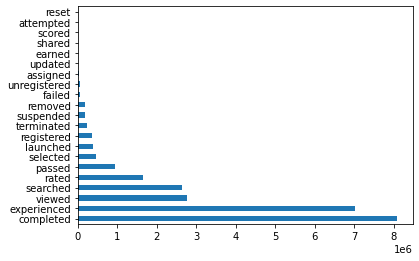

In [12]:
coles_df_staff['verb'].value_counts().plot(kind = 'barh')

In [13]:
coles_df_manager['verb'].value_counts()

experienced     4919632
completed       1847653
viewed           674846
searched         656947
rated            231705
assigned         134337
passed            64501
selected          63303
registered        60629
launched          60443
removed           33711
suspended         23700
shared            15217
unregistered      13978
terminated        13300
failed             3076
updated            1263
earned             1112
scored              359
attempted            50
Name: verb, dtype: int64

<AxesSubplot:>

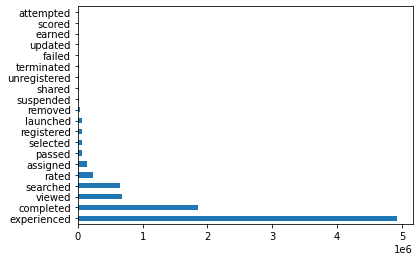

In [14]:
coles_df_manager['verb'].value_counts().plot(kind = 'barh')

Fontconfig warning: ignoring UTF-8: not a valid region tag


<AxesSubplot:xlabel='count', ylabel='verb'>

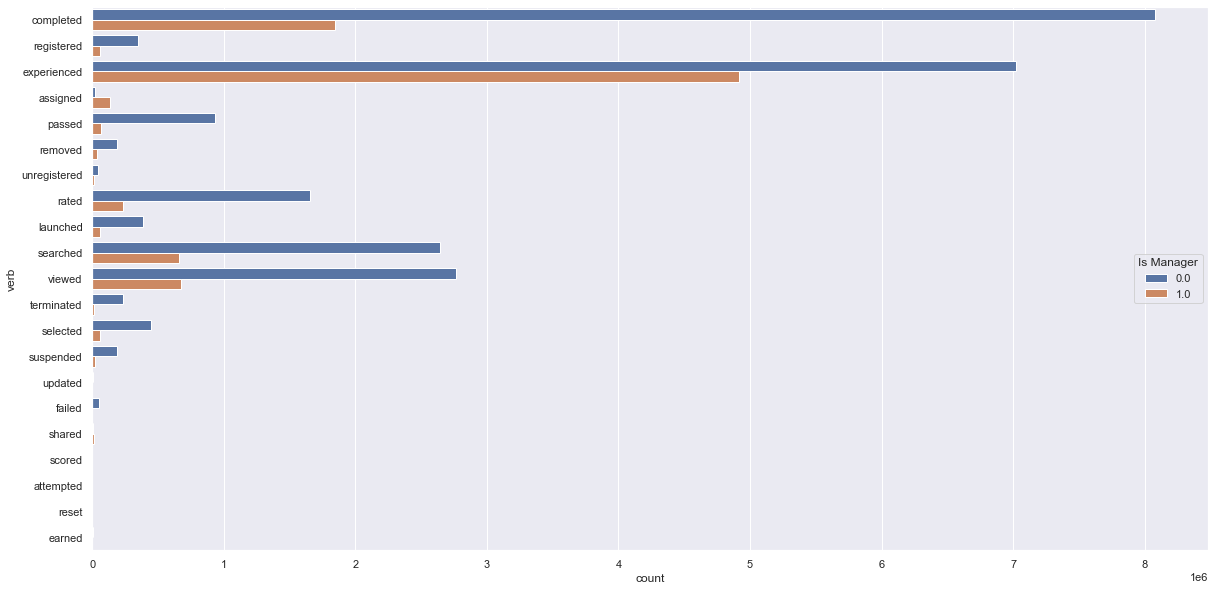

In [13]:
sns.set(rc = {'figure.figsize': (20, 10)})
sns.countplot(data=coles_df, y='verb', hue = 'Is Manager')

In [97]:
verbs = coles_df['verb'].unique().tolist()
coles_df1 = coles_df[coles_df['verb'].isin(verbs[:7])]
coles_df2 = coles_df[coles_df['verb'].isin(verbs[7:14])]
coles_df3 = coles_df[coles_df['verb'].isin(verbs[14:])]

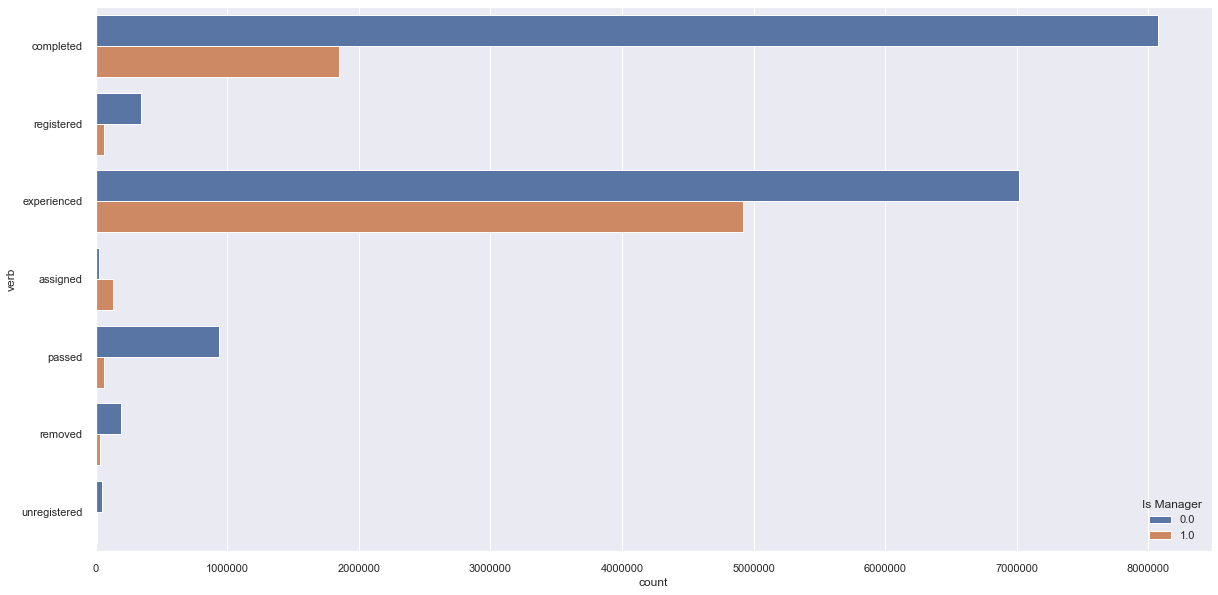

In [103]:
# Graph 1 

sns.set(rc = {'figure.figsize': (20, 10)})
sns.countplot(data=coles_df1, y='verb', hue = 'Is Manager')
plt.ticklabel_format(style = 'plain', axis = 'x', useOffset=False)

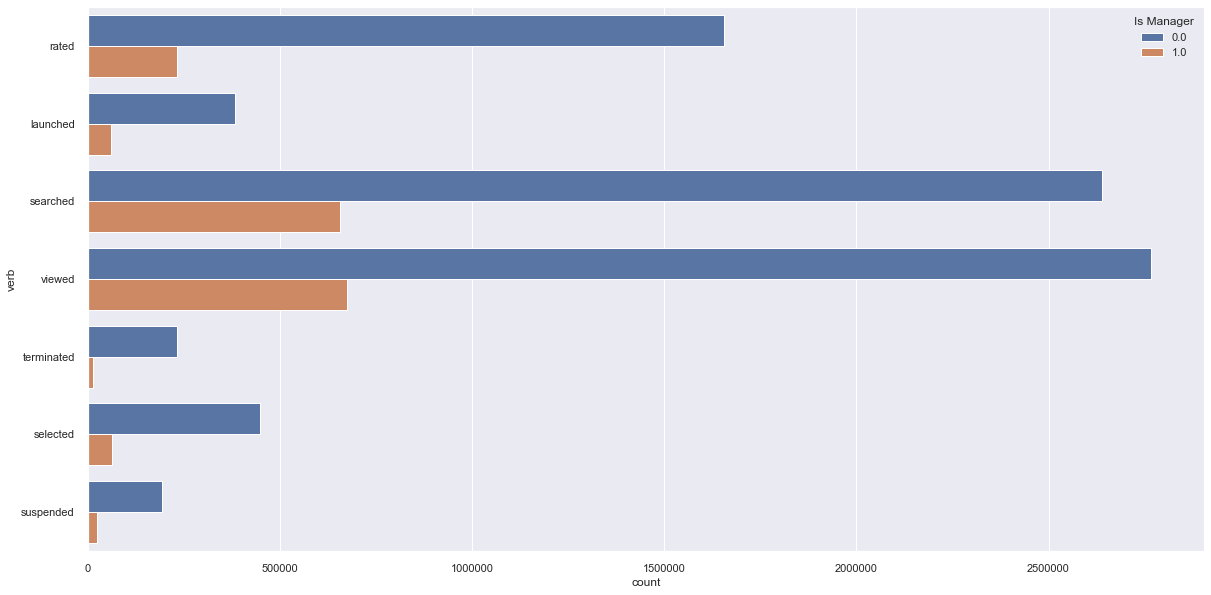

In [104]:
# Graph 2 

sns.set(rc = {'figure.figsize': (20, 10)})
sns.countplot(data=coles_df2, y='verb', hue = 'Is Manager')
plt.ticklabel_format(style = 'plain', axis = 'x', useOffset=False)

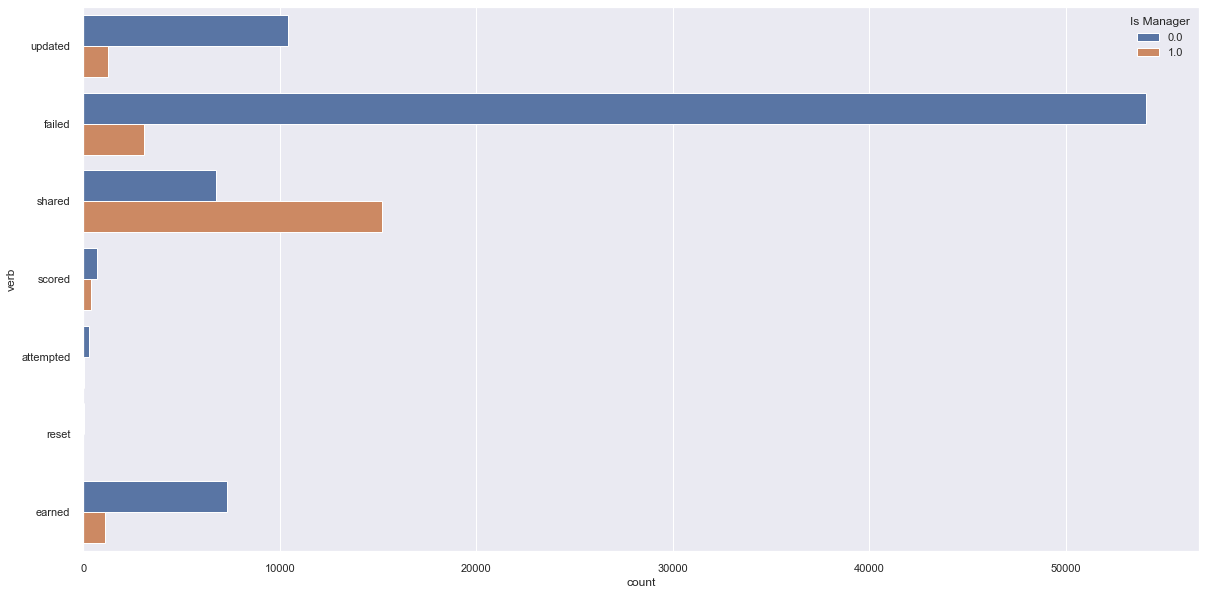

In [105]:
# Graph 3

sns.set(rc = {'figure.figsize': (20, 10)})
sns.countplot(data=coles_df3, y='verb', hue = 'Is Manager')
plt.ticklabel_format(style = 'plain', axis = 'x', useOffset=False)

# Prep Manager Data for Modelling

## Verb + Activity

In [106]:
df_manager_verb_activity = coles_df_manager[['actorId', 'verb', 'activity']]
df_manager_verb_activity

,actorId,verb,activity
0,0,completed,activities
1,1,completed,activities
2,2,completed,activities
3,3,completed,activities
4,4,completed,activities
...,...,...,...
33892235,1596,experienced,dashboard
33892236,1533,experienced,learning
33892238,23257,completed,Coles_Values
33892241,11218,experienced,profile


In [147]:
# Verb + Activity Count 

verb_activity_count = coles_df_manager[['verb', 'activity']].value_counts()

verb_activity_count_list = verb_activity_count[verb_activity_count > 100].index.tolist()

verb_list = [i[0] for i in verb_activity_count_list]
activity_list = [i[1] for i in verb_activity_count_list]

df_manager_filtered = df_manager_verb_activity[(df_manager_verb_activity['verb'].isin(verb_list)) & (df_manager_verb_activity['activity'].isin(activity_list))]
df_manager_filtered

,actorId,verb,activity
0,0,completed,activities
1,1,completed,activities
2,2,completed,activities
3,3,completed,activities
4,4,completed,activities
...,...,...,...
33892235,1596,experienced,dashboard
33892236,1533,experienced,learning
33892238,23257,completed,Coles_Values
33892241,11218,experienced,profile


In [151]:
df_manager_filtered[['verb', 'activity']].value_counts()

verb         activity                   
completed    activities                     1721764
experienced  learning                       1434294
             team                            755555
viewed       results                         674846
searched     search                          656947
                                             ...   
assigned     CEXP:_Think_Safe,_Lift_Safe          2
             learningseat_course                  1
shared       102                                  1
completed    25                                   1
shared       video-EAS.html                       1
Length: 407, dtype: int64

In [152]:
df_manager_new = df_manager_filtered
df_manager_new['occurrence'] = 1
df_manager_new

/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_21318/3940082627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manager_new['occurrence'] = 1


,actorId,verb,activity,occurrence
0,0,completed,activities,1
1,1,completed,activities,1
2,2,completed,activities,1
3,3,completed,activities,1
4,4,completed,activities,1
...,...,...,...,...
33892235,1596,experienced,dashboard,1
33892236,1533,experienced,learning,1
33892238,23257,completed,Coles_Values,1
33892241,11218,experienced,profile,1


In [165]:
# Clean & Prep Dataframe 
# Generate pivot table 
df_manager_pivot = pd.pivot_table(df_manager_new, values='occurrence', index = 'actorId', columns = ['verb', 'activity'], aggfunc='count')

# Convert pivot table to dataframe
df_manager_pivot = df_manager_pivot.reset_index()

# Remove index header
# df_manager_pivot = df_manager_pivot.rename_axis(None, axis = 1)

# Replace Nan with 0 for an entire dataframe
df_manager_pivot = df_manager_pivot.replace(np.nan, 0)

df_manager_pivot

verb     actorId assigned                                             \
activity              102   25   45 Apple_Bites Broccoli_Fresh_Bites   
0              0      0.0  0.0  0.0         0.0                  0.0   
1              1      0.0  0.0  0.0         0.0                  0.0   
2              2      0.0  0.0  0.0         1.0                  0.0   
3              3      0.0  0.0  0.0         0.0                  0.0   
4              4      0.0  0.0  0.0         0.0                  0.0   
...          ...      ...  ...  ...         ...                  ...   
12756     174196      0.0  0.0  0.0         0.0                  0.0   
12757     174449      0.0  0.0  0.0         0.0                  0.0   
12758     174633      0.0  0.0  0.0         0.0                  0.0   
12759     174678      0.0  0.0  0.0         0.0                  0.0   
12760     174711      0.0  0.0  0.0         0.0                  0.0   

verb                                                                  \
activity CEXP:_Think_Safe,_Lift_Safe Coles_Values Floral_Fresh_Bites   
0                                0.0          0.0                0.0   
1                                0.0          0.0                0.0   
2                                0.0          0.0                0.0   
3                                0.0          0.0                0.0   
4                                0.0          0.0                0.0   
...                              ...          ...                ...   
12756                            0.0          0.0                0.0   
12757                            0.0          0.0                0.0   
12758                            0.0          0.0                0.0   
12759                            0.0          0.0                0.0   
12760                            0.0          0.0                0.0   

verb                         ...         unregistered                      \
activity Potato_Fresh_Bites  ... move-smart-stay-safe pavlova_Fresh_Bites   
0                       0.0  ...                  0.0                 0.0   
1                       0.0  ...                  0.0                 0.0   
2                       0.0  ...                  0.0                 0.0   
3                       0.0  ...                  0.0                 0.0   
4                       0.0  ...                  0.0                 0.0   
...                     ...  ...                  ...                 ...   
12756                   0.0  ...                  0.0                 0.0   
12757                   0.0  ...                  0.0                 0.0   
12758                   0.0  ...                  0.0                 0.0   
12759                   0.0  ...                  0.0                 0.0   
12760                   0.0  ...                  0.0                 0.0   

verb                                                                           \
activity serveup.com.au tobaccorefreshertraining video-AntiSweepShelving.html   
0                   0.0                      0.0                          0.0   
1                   0.0                      0.0                          0.0   
2                   0.0                      0.0                          0.0   
3                   0.0                      0.0                          0.0   
4                   0.0                      1.0                          0.0   
...                 ...                      ...                          ...   
12756               0.0                      0.0                          0.0   
12757               0.0                      0.0                          0.0   
12758               0.0                      0.0                          0.0   
12759               0.0                      0.0                          0.0   
12760               0.0                      0.0                          0.0   

verb                                                                  

In [166]:
# Generate dataframe without actorId 

df_manager_noid = df_manager_pivot.drop(['actorId'], axis = 1)
df_manager_noid

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


verb     assigned                                             \
activity      102   25   45 Apple_Bites Broccoli_Fresh_Bites   
0             0.0  0.0  0.0         0.0                  0.0   
1             0.0  0.0  0.0         0.0                  0.0   
2             0.0  0.0  0.0         1.0                  0.0   
3             0.0  0.0  0.0         0.0                  0.0   
4             0.0  0.0  0.0         0.0                  0.0   
...           ...  ...  ...         ...                  ...   
12756         0.0  0.0  0.0         0.0                  0.0   
12757         0.0  0.0  0.0         0.0                  0.0   
12758         0.0  0.0  0.0         0.0                  0.0   
12759         0.0  0.0  0.0         0.0                  0.0   
12760         0.0  0.0  0.0         0.0                  0.0   

verb                                                                  \
activity CEXP:_Think_Safe,_Lift_Safe Coles_Values Floral_Fresh_Bites   
0                                0.0          0.0                0.0   
1                                0.0          0.0                0.0   
2                                0.0          0.0                0.0   
3                                0.0          0.0                0.0   
4                                0.0          0.0                0.0   
...                              ...          ...                ...   
12756                            0.0          0.0                0.0   
12757                            0.0          0.0                0.0   
12758                            0.0          0.0                0.0   
12759                            0.0          0.0                0.0   
12760                            0.0          0.0                0.0   

verb                                                 ...         unregistered  \
activity Potato_Fresh_Bites ScamAwareness14-05-2018  ... move-smart-stay-safe   
0                       0.0                     0.0  ...                  0.0   
1                       0.0                     0.0  ...                  0.0   
2                       0.0                     0.0  ...                  0.0   
3                       0.0                     0.0  ...                  0.0   
4                       0.0                     0.0  ...                  0.0   
...                     ...                     ...  ...                  ...   
12756                   0.0                     0.0  ...                  0.0   
12757                   0.0                     0.0  ...                  0.0   
12758                   0.0                     0.0  ...                  0.0   
12759                   0.0                     0.0  ...                  0.0   
12760                   0.0                     0.0  ...                  0.0   

verb                                                                  \
activity pavlova_Fresh_Bites serveup.com.au tobaccorefreshertraining   
0                        0.0            0.0                      0.0   
1                        0.0            0.0                      0.0   
2                        0.0            0.0                      0.0   
3                        0.0            0.0                      0.0   
4                        0.0            0.0                      1.0   
...                      ...            ...                      ...   
12756                    0.0            0.0                      0.0   
12757                    0.0            0.0                      0.0   
12758                    0.0            0.0                      0.0   
12759                    0.0            0.0                      0.0   
12760                    0.0            0.0                      0.0   

verb                                                                      \
activity video-AntiSweepShelving.html video-EAS.html video-Headsets.html   
0                                 0.0            0.0                 0.0   
1          

In [167]:
# Create scaled Dataframe where each variable has mean of 0 and standard dev of 1 

df_manager_scaled = StandardScaler().fit_transform(df_manager_noid)

df_manager_scaled

array([[-0.01767095, -0.02046424, -0.0211554 , ..., -0.0460468 ,
        -0.18326225,  1.23404366],
       [-0.01767095, -0.02046424, -0.0211554 , ..., -0.0460468 ,
        -0.18326225, -0.32490724],
       [-0.01767095, -0.02046424, -0.0211554 , ..., -0.0460468 ,
        -0.18326225, -0.04281136],
       ...,
       [-0.01767095, -0.02046424, -0.0211554 , ..., -0.0460468 ,
        -0.18326225, -0.78516893],
       [-0.01767095, -0.02046424, -0.0211554 , ..., -0.0460468 ,
        -0.18326225, -0.78516893],
       [-0.01767095, -0.02046424, -0.0211554 , ..., -0.0460468 ,
        -0.18326225, -0.78516893]])

### Modelling

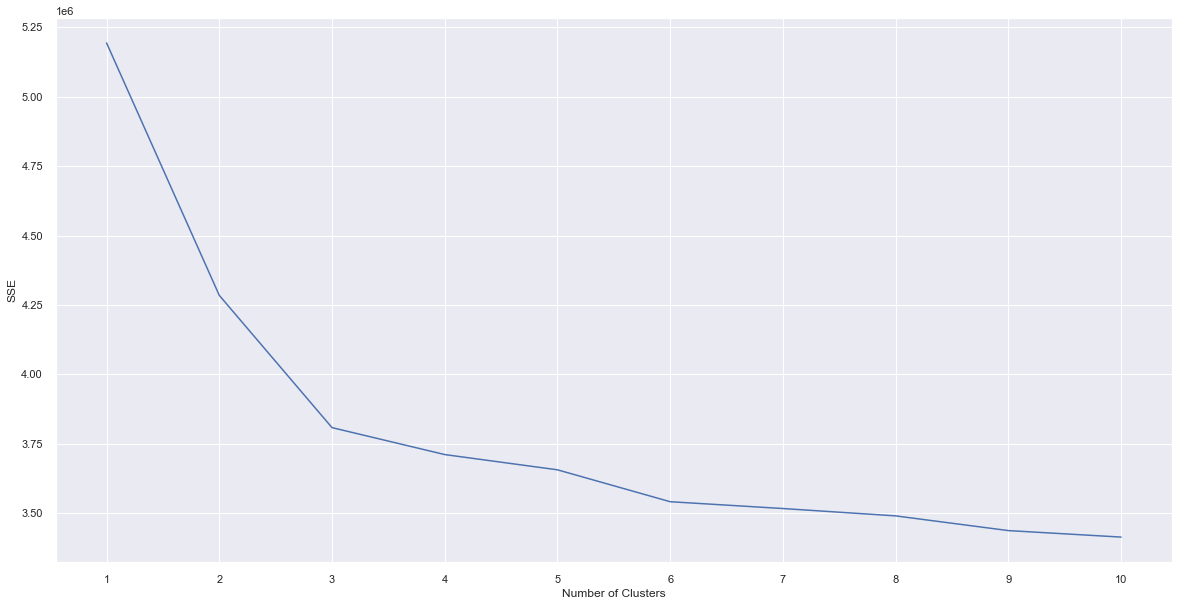

In [168]:
# Find the Optimal number of clusteres
# Intialise k-means parameters 

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1
}

# Create list to hold SSE values for each k 
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(df_manager_scaled)
    sse.append(kmeans.inertia_)

# Visualise results 
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Number of Clusters = 3

In [169]:
# Perform K-Means clustering with Optimal K 
# Instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init = "random", n_clusters=3, n_init=10, random_state=1)

# Fit k-means algorithms to data
kmeans.fit(df_manager_scaled)

# View cluster assignments for each observation
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [170]:
# Append cluster assignments to original dataframe

df_manager_cluster = df_manager_pivot
df_manager_cluster['cluster'] = kmeans.labels_
df_manager_cluster

verb     actorId assigned                                             \
activity              102   25   45 Apple_Bites Broccoli_Fresh_Bites   
0              0      0.0  0.0  0.0         0.0                  0.0   
1              1      0.0  0.0  0.0         0.0                  0.0   
2              2      0.0  0.0  0.0         1.0                  0.0   
3              3      0.0  0.0  0.0         0.0                  0.0   
4              4      0.0  0.0  0.0         0.0                  0.0   
...          ...      ...  ...  ...         ...                  ...   
12756     174196      0.0  0.0  0.0         0.0                  0.0   
12757     174449      0.0  0.0  0.0         0.0                  0.0   
12758     174633      0.0  0.0  0.0         0.0                  0.0   
12759     174678      0.0  0.0  0.0         0.0                  0.0   
12760     174711      0.0  0.0  0.0         0.0                  0.0   

verb                                                                  \
activity CEXP:_Think_Safe,_Lift_Safe Coles_Values Floral_Fresh_Bites   
0                                0.0          0.0                0.0   
1                                0.0          0.0                0.0   
2                                0.0          0.0                0.0   
3                                0.0          0.0                0.0   
4                                0.0          0.0                0.0   
...                              ...          ...                ...   
12756                            0.0          0.0                0.0   
12757                            0.0          0.0                0.0   
12758                            0.0          0.0                0.0   
12759                            0.0          0.0                0.0   
12760                            0.0          0.0                0.0   

verb                         ...        unregistered                 \
activity Potato_Fresh_Bites  ... pavlova_Fresh_Bites serveup.com.au   
0                       0.0  ...                 0.0            0.0   
1                       0.0  ...                 0.0            0.0   
2                       0.0  ...                 0.0            0.0   
3                       0.0  ...                 0.0            0.0   
4                       0.0  ...                 0.0            0.0   
...                     ...  ...                 ...            ...   
12756                   0.0  ...                 0.0            0.0   
12757                   0.0  ...                 0.0            0.0   
12758                   0.0  ...                 0.0            0.0   
12759                   0.0  ...                 0.0            0.0   
12760                   0.0  ...                 0.0            0.0   

verb                                                                           \
activity tobaccorefreshertraining video-AntiSweepShelving.html video-EAS.html   
0                             0.0                          0.0            0.0   
1                             0.0                          0.0            0.0   
2                             0.0                          0.0            0.0   
3                             0.0                          0.0            0.0   
4                             1.0                          0.0            0.0   
...                           ...                          ...            ...   
12756                         0.0                          0.0            0.0   
12757                         0.0                          0.0            0.0   
12758                         0.0                          0.0            0.0   
12759                         0.0                          0.0            0.0   
12760                         0.0                          0.0            0.0   

verb                                                      updated  viewed  \
activity video-Headsets.html video-ProductProtection.html   photo resul

In [172]:
df_manager_cluster['cluster'].unique()

array([1, 0, 2], dtype=int32)

In [173]:
df_manager_c0 = df_manager_cluster[df_manager_cluster['cluster'] == 0]
df_manager_c1 = df_manager_cluster[df_manager_cluster['cluster'] == 1]
df_manager_c2 = df_manager_cluster[df_manager_cluster['cluster'] == 2]

In [174]:
df_manager_c0

verb     actorId assigned                                             \
activity              102   25   45 Apple_Bites Broccoli_Fresh_Bites   
12            12      0.0  0.0  0.0         0.0                  0.0   
22            34      0.0  0.0  0.0         0.0                  0.0   
33            68      0.0  0.0  0.0         0.0                  0.0   
63           165      0.0  0.0  0.0         0.0                  0.0   
84           236      0.0  0.0  0.0         0.0                  0.0   
...          ...      ...  ...  ...         ...                  ...   
12633     163037      0.0  0.0  0.0         0.0                  0.0   
12647     163798      0.0  0.0  0.0         0.0                  0.0   
12657     164981      0.0  0.0  0.0         0.0                  0.0   
12660     165081      0.0  0.0  0.0         0.0                  0.0   
12668     165785      0.0  0.0  0.0         0.0                  0.0   

verb                                                                  \
activity CEXP:_Think_Safe,_Lift_Safe Coles_Values Floral_Fresh_Bites   
12                               0.0          0.0                0.0   
22                               0.0          0.0                0.0   
33                               0.0          0.0                0.0   
63                               0.0          0.0                0.0   
84                               0.0          0.0                0.0   
...                              ...          ...                ...   
12633                            0.0          0.0                0.0   
12647                            0.0          0.0                0.0   
12657                            0.0          0.0                0.0   
12660                            0.0          0.0                0.0   
12668                            0.0          0.0                0.0   

verb                         ...        unregistered                 \
activity Potato_Fresh_Bites  ... pavlova_Fresh_Bites serveup.com.au   
12                      0.0  ...                 0.0            0.0   
22                      0.0  ...                 0.0            0.0   
33                      0.0  ...                 0.0            0.0   
63                      0.0  ...                 0.0            0.0   
84                      0.0  ...                 0.0            0.0   
...                     ...  ...                 ...            ...   
12633                   0.0  ...                 0.0            0.0   
12647                   0.0  ...                 0.0            0.0   
12657                   0.0  ...                 0.0            0.0   
12660                   0.0  ...                 0.0            0.0   
12668                   0.0  ...                 0.0            0.0   

verb                                                                           \
activity tobaccorefreshertraining video-AntiSweepShelving.html video-EAS.html   
12                            0.0                          0.0            0.0   
22                            0.0                          0.0            0.0   
33                            0.0                          0.0            0.0   
63                            0.0                          0.0            0.0   
84                            0.0                          0.0            0.0   
...                           ...                          ...            ...   
12633                         0.0                          0.0            0.0   
12647                         0.0                          0.0            0.0   
12657                         1.0                          0.0            0.0   
12660                         0.0                          0.0            0.0   
12668                         0.0                          0.0            0.0   

verb                                                      updated  viewed  \
activity video-Headsets.html video-ProductProtection.html   photo resul

In [175]:
df_manager_c1

verb     actorId assigned                                             \
activity              102   25   45 Apple_Bites Broccoli_Fresh_Bites   
0              0      0.0  0.0  0.0         0.0                  0.0   
1              1      0.0  0.0  0.0         0.0                  0.0   
2              2      0.0  0.0  0.0         1.0                  0.0   
3              3      0.0  0.0  0.0         0.0                  0.0   
4              4      0.0  0.0  0.0         0.0                  0.0   
...          ...      ...  ...  ...         ...                  ...   
12756     174196      0.0  0.0  0.0         0.0                  0.0   
12757     174449      0.0  0.0  0.0         0.0                  0.0   
12758     174633      0.0  0.0  0.0         0.0                  0.0   
12759     174678      0.0  0.0  0.0         0.0                  0.0   
12760     174711      0.0  0.0  0.0         0.0                  0.0   

verb                                                                  \
activity CEXP:_Think_Safe,_Lift_Safe Coles_Values Floral_Fresh_Bites   
0                                0.0          0.0                0.0   
1                                0.0          0.0                0.0   
2                                0.0          0.0                0.0   
3                                0.0          0.0                0.0   
4                                0.0          0.0                0.0   
...                              ...          ...                ...   
12756                            0.0          0.0                0.0   
12757                            0.0          0.0                0.0   
12758                            0.0          0.0                0.0   
12759                            0.0          0.0                0.0   
12760                            0.0          0.0                0.0   

verb                         ...        unregistered                 \
activity Potato_Fresh_Bites  ... pavlova_Fresh_Bites serveup.com.au   
0                       0.0  ...                 0.0            0.0   
1                       0.0  ...                 0.0            0.0   
2                       0.0  ...                 0.0            0.0   
3                       0.0  ...                 0.0            0.0   
4                       0.0  ...                 0.0            0.0   
...                     ...  ...                 ...            ...   
12756                   0.0  ...                 0.0            0.0   
12757                   0.0  ...                 0.0            0.0   
12758                   0.0  ...                 0.0            0.0   
12759                   0.0  ...                 0.0            0.0   
12760                   0.0  ...                 0.0            0.0   

verb                                                                           \
activity tobaccorefreshertraining video-AntiSweepShelving.html video-EAS.html   
0                             0.0                          0.0            0.0   
1                             0.0                          0.0            0.0   
2                             0.0                          0.0            0.0   
3                             0.0                          0.0            0.0   
4                             1.0                          0.0            0.0   
...                           ...                          ...            ...   
12756                         0.0                          0.0            0.0   
12757                         0.0                          0.0            0.0   
12758                         0.0                          0.0            0.0   
12759                         0.0                          0.0            0.0   
12760                         0.0                          0.0            0.0   

verb                                                      updated  viewed  \
activity video-Headsets.html video-ProductProtection.html   photo resul

In [176]:
df_manager_c2

verb     actorId assigned                                             \
activity              102   25   45 Apple_Bites Broccoli_Fresh_Bites   
35            72      0.0  0.0  0.0         0.0                  0.0   
39            96      0.0  0.0  0.0         0.0                  0.0   
105          315      0.0  0.0  0.0         0.0                  0.0   
173          548      0.0  0.0  0.0         0.0                  0.0   
209          660      0.0  0.0  0.0         0.0                  0.0   
...          ...      ...  ...  ...         ...                  ...   
12396     145557      0.0  0.0  0.0         0.0                  0.0   
12400     145784      0.0  0.0  0.0         0.0                  0.0   
12426     147788      0.0  0.0  0.0         0.0                  0.0   
12540     155569      0.0  0.0  0.0         0.0                  0.0   
12634     163050      0.0  0.0  0.0         0.0                  0.0   

verb                                                                  \
activity CEXP:_Think_Safe,_Lift_Safe Coles_Values Floral_Fresh_Bites   
35                               0.0          0.0                0.0   
39                               0.0          0.0                0.0   
105                              0.0          0.0                0.0   
173                              0.0          0.0                0.0   
209                              0.0          0.0                0.0   
...                              ...          ...                ...   
12396                            0.0          0.0                0.0   
12400                            0.0          0.0                0.0   
12426                            0.0          0.0                0.0   
12540                            0.0          0.0                0.0   
12634                            0.0          0.0                0.0   

verb                         ...        unregistered                 \
activity Potato_Fresh_Bites  ... pavlova_Fresh_Bites serveup.com.au   
35                      0.0  ...                 0.0            0.0   
39                      0.0  ...                 0.0            0.0   
105                     0.0  ...                 0.0            0.0   
173                     0.0  ...                 0.0            0.0   
209                     0.0  ...                 0.0            0.0   
...                     ...  ...                 ...            ...   
12396                   0.0  ...                 0.0            0.0   
12400                   0.0  ...                 0.0            0.0   
12426                   0.0  ...                 0.0            0.0   
12540                   0.0  ...                 0.0            0.0   
12634                   0.0  ...                 0.0            0.0   

verb                                                                           \
activity tobaccorefreshertraining video-AntiSweepShelving.html video-EAS.html   
35                            0.0                          0.0            0.0   
39                            0.0                          0.0            0.0   
105                           1.0                          0.0            0.0   
173                           0.0                          0.0            0.0   
209                           0.0                          0.0            0.0   
...                           ...                          ...            ...   
12396                         0.0                          0.0            0.0   
12400                         0.0                          0.0            0.0   
12426                         0.0                          0.0            0.0   
12540                         0.0                          0.0            0.0   
12634                         0.0                          0.0            0.0   

verb                                                      updated  viewed  \
activity video-Headsets.html video-ProductProtection.html   photo resul

In [182]:
df_manager_cluster

verb     actorId assigned                                             \
activity              102   25   45 Apple_Bites Broccoli_Fresh_Bites   
0              0      0.0  0.0  0.0         0.0                  0.0   
1              1      0.0  0.0  0.0         0.0                  0.0   
2              2      0.0  0.0  0.0         1.0                  0.0   
3              3      0.0  0.0  0.0         0.0                  0.0   
4              4      0.0  0.0  0.0         0.0                  0.0   
...          ...      ...  ...  ...         ...                  ...   
12756     174196      0.0  0.0  0.0         0.0                  0.0   
12757     174449      0.0  0.0  0.0         0.0                  0.0   
12758     174633      0.0  0.0  0.0         0.0                  0.0   
12759     174678      0.0  0.0  0.0         0.0                  0.0   
12760     174711      0.0  0.0  0.0         0.0                  0.0   

verb                                                                  \
activity CEXP:_Think_Safe,_Lift_Safe Coles_Values Floral_Fresh_Bites   
0                                0.0          0.0                0.0   
1                                0.0          0.0                0.0   
2                                0.0          0.0                0.0   
3                                0.0          0.0                0.0   
4                                0.0          0.0                0.0   
...                              ...          ...                ...   
12756                            0.0          0.0                0.0   
12757                            0.0          0.0                0.0   
12758                            0.0          0.0                0.0   
12759                            0.0          0.0                0.0   
12760                            0.0          0.0                0.0   

verb                         ...        unregistered                 \
activity Potato_Fresh_Bites  ... pavlova_Fresh_Bites serveup.com.au   
0                       0.0  ...                 0.0            0.0   
1                       0.0  ...                 0.0            0.0   
2                       0.0  ...                 0.0            0.0   
3                       0.0  ...                 0.0            0.0   
4                       0.0  ...                 0.0            0.0   
...                     ...  ...                 ...            ...   
12756                   0.0  ...                 0.0            0.0   
12757                   0.0  ...                 0.0            0.0   
12758                   0.0  ...                 0.0            0.0   
12759                   0.0  ...                 0.0            0.0   
12760                   0.0  ...                 0.0            0.0   

verb                                                                           \
activity tobaccorefreshertraining video-AntiSweepShelving.html video-EAS.html   
0                             0.0                          0.0            0.0   
1                             0.0                          0.0            0.0   
2                             0.0                          0.0            0.0   
3                             0.0                          0.0            0.0   
4                             1.0                          0.0            0.0   
...                           ...                          ...            ...   
12756                         0.0                          0.0            0.0   
12757                         0.0                          0.0            0.0   
12758                         0.0                          0.0            0.0   
12759                         0.0                          0.0            0.0   
12760                         0.0                          0.0            0.0   

verb                                                      updated  viewed  \
activity video-Headsets.html video-ProductProtection.html   photo resul

In [198]:
df_manager_cluster['completed']

activity,102,25,3995,3996,3997,4006,4007,4009,4010,4025,...,course_id,learningseat_course,lookup_legend2,move-smart-stay-safe,serveup.com.au,tobaccorefreshertraining,video-AntiSweepShelving.html,video-EAS.html,video-Headsets.html,video-ProductProtection.html
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


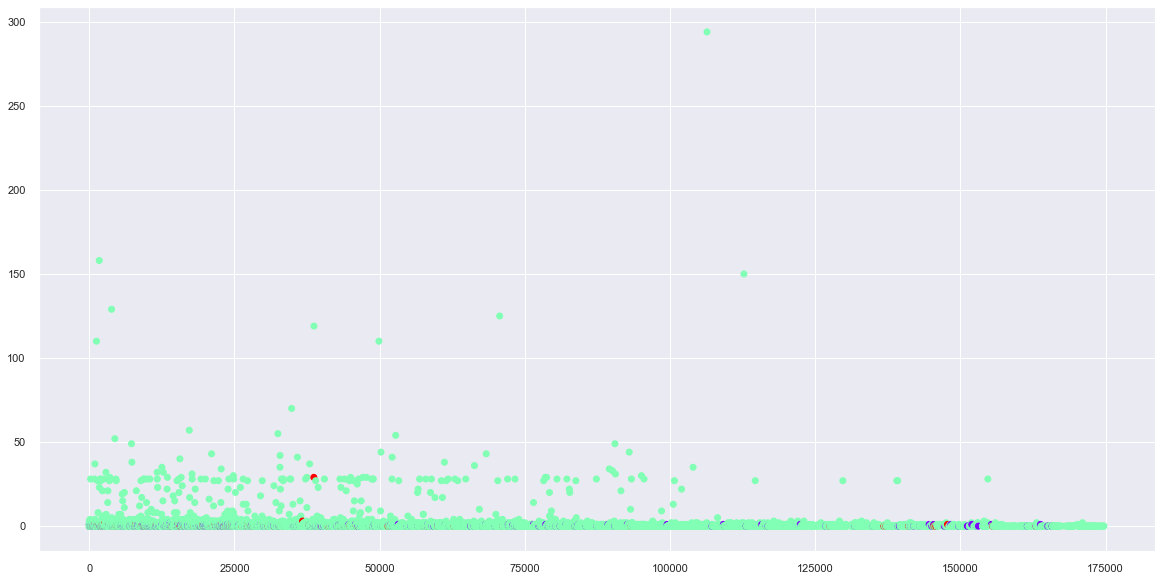

In [202]:
plt.scatter(df_manager_cluster['actorId'], df_manager_cluster['completed']['course_id'], c=df_manager_cluster['cluster'], cmap='rainbow')

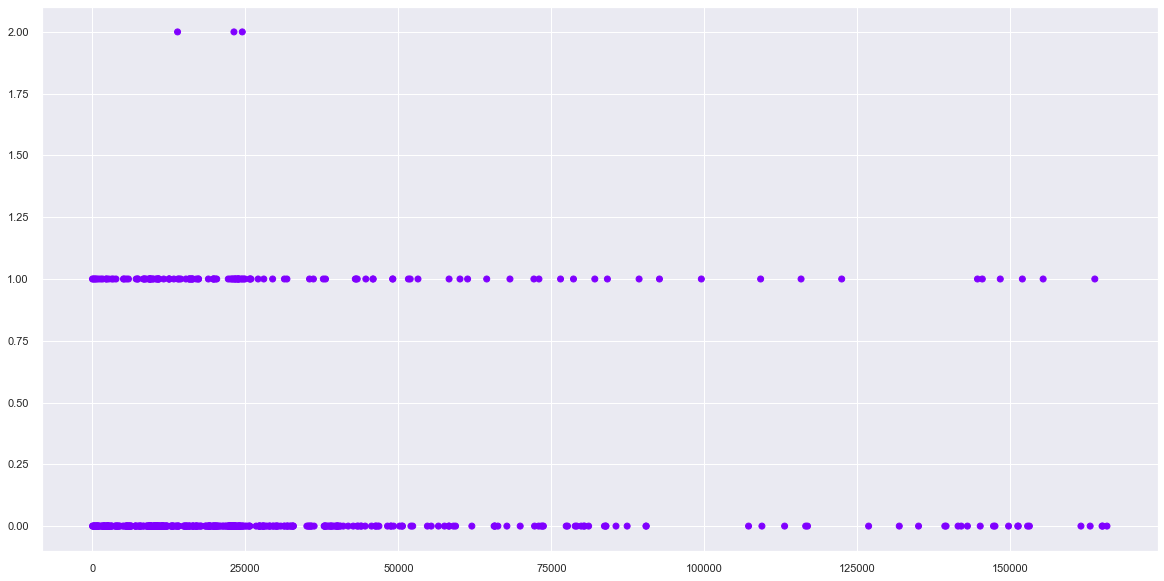

In [203]:
plt.scatter(df_manager_c0['actorId'], df_manager_c0['completed']['course_id'], c=df_manager_c0['cluster'], cmap='rainbow')


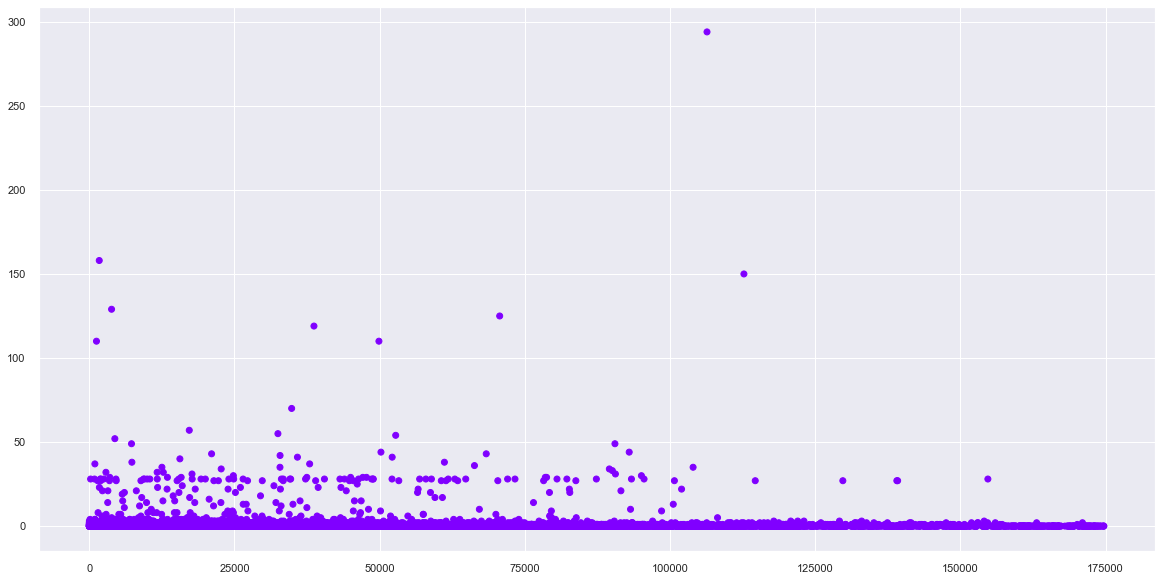

In [204]:
plt.scatter(df_manager_c1['actorId'], df_manager_c1['completed']['course_id'], c=df_manager_c1['cluster'], cmap='rainbow')

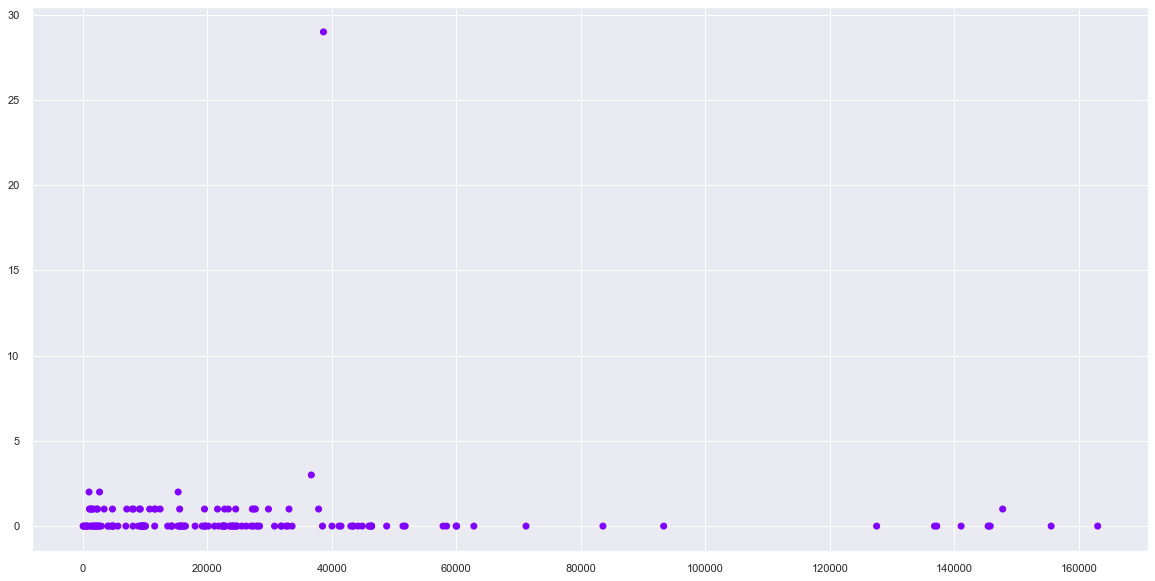

In [205]:
plt.scatter(df_manager_c2['actorId'], df_manager_c2['completed']['course_id'], c=df_manager_c2['cluster'], cmap='rainbow')


### Number of Clusters = 6

In [206]:
# Perform K-Means clustering with Optimal K 
# Instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init = "random", n_clusters=6, n_init=10, random_state=1)

# Fit k-means algorithms to data
kmeans.fit(df_manager_scaled)

# View cluster assignments for each observation
kmeans.labels_

array([2, 5, 2, ..., 5, 5, 5], dtype=int32)

In [207]:
# Append cluster assignments to original dataframe

df_manager_cluster = df_manager_pivot
df_manager_cluster['cluster'] = kmeans.labels_
df_manager_cluster

verb     actorId assigned                                             \
activity              102   25   45 Apple_Bites Broccoli_Fresh_Bites   
0              0      0.0  0.0  0.0         0.0                  0.0   
1              1      0.0  0.0  0.0         0.0                  0.0   
2              2      0.0  0.0  0.0         1.0                  0.0   
3              3      0.0  0.0  0.0         0.0                  0.0   
4              4      0.0  0.0  0.0         0.0                  0.0   
...          ...      ...  ...  ...         ...                  ...   
12756     174196      0.0  0.0  0.0         0.0                  0.0   
12757     174449      0.0  0.0  0.0         0.0                  0.0   
12758     174633      0.0  0.0  0.0         0.0                  0.0   
12759     174678      0.0  0.0  0.0         0.0                  0.0   
12760     174711      0.0  0.0  0.0         0.0                  0.0   

verb                                                                  \
activity CEXP:_Think_Safe,_Lift_Safe Coles_Values Floral_Fresh_Bites   
0                                0.0          0.0                0.0   
1                                0.0          0.0                0.0   
2                                0.0          0.0                0.0   
3                                0.0          0.0                0.0   
4                                0.0          0.0                0.0   
...                              ...          ...                ...   
12756                            0.0          0.0                0.0   
12757                            0.0          0.0                0.0   
12758                            0.0          0.0                0.0   
12759                            0.0          0.0                0.0   
12760                            0.0          0.0                0.0   

verb                         ...        unregistered                 \
activity Potato_Fresh_Bites  ... pavlova_Fresh_Bites serveup.com.au   
0                       0.0  ...                 0.0            0.0   
1                       0.0  ...                 0.0            0.0   
2                       0.0  ...                 0.0            0.0   
3                       0.0  ...                 0.0            0.0   
4                       0.0  ...                 0.0            0.0   
...                     ...  ...                 ...            ...   
12756                   0.0  ...                 0.0            0.0   
12757                   0.0  ...                 0.0            0.0   
12758                   0.0  ...                 0.0            0.0   
12759                   0.0  ...                 0.0            0.0   
12760                   0.0  ...                 0.0            0.0   

verb                                                                           \
activity tobaccorefreshertraining video-AntiSweepShelving.html video-EAS.html   
0                             0.0                          0.0            0.0   
1                             0.0                          0.0            0.0   
2                             0.0                          0.0            0.0   
3                             0.0                          0.0            0.0   
4                             1.0                          0.0            0.0   
...                           ...                          ...            ...   
12756                         0.0                          0.0            0.0   
12757                         0.0                          0.0            0.0   
12758                         0.0                          0.0            0.0   
12759                         0.0                          0.0            0.0   
12760                         0.0                          0.0            0.0   

verb                                                      updated  viewed  \
activity video-Headsets.html video-ProductProtection.html   photo resul

In [208]:
df_manager_c0 = df_manager_cluster[df_manager_cluster['cluster'] == 0]
df_manager_c1 = df_manager_cluster[df_manager_cluster['cluster'] == 1]
df_manager_c2 = df_manager_cluster[df_manager_cluster['cluster'] == 2]
df_manager_c3 = df_manager_cluster[df_manager_cluster['cluster'] == 3]
df_manager_c4 = df_manager_cluster[df_manager_cluster['cluster'] == 4]
df_manager_c5 = df_manager_cluster[df_manager_cluster['cluster'] == 5]

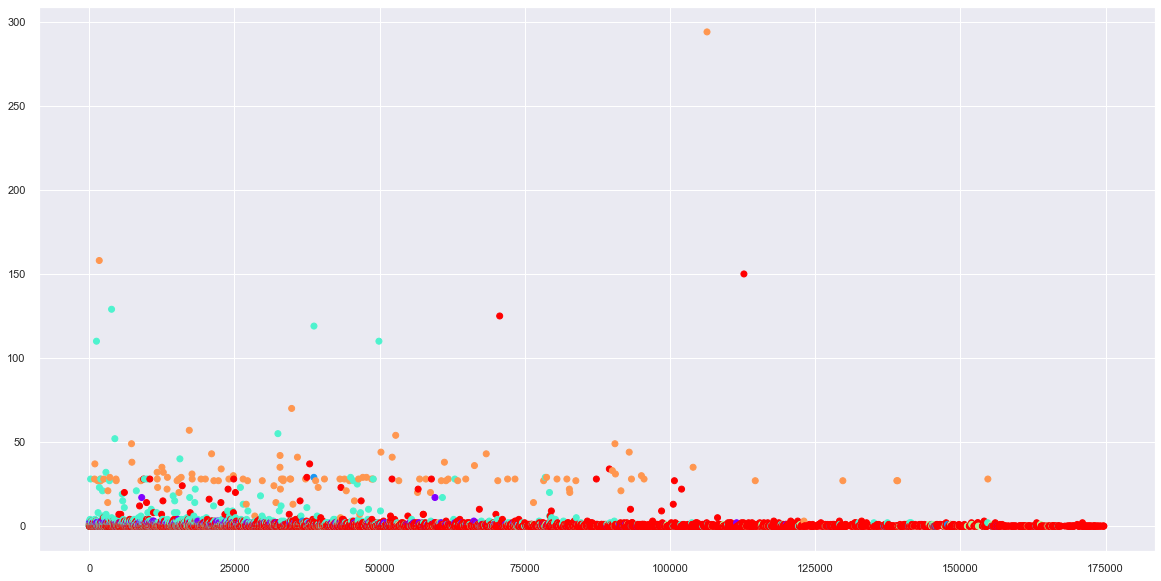

In [209]:
plt.scatter(df_manager_cluster['actorId'], df_manager_cluster['completed']['course_id'], c=df_manager_cluster['cluster'], cmap='rainbow')

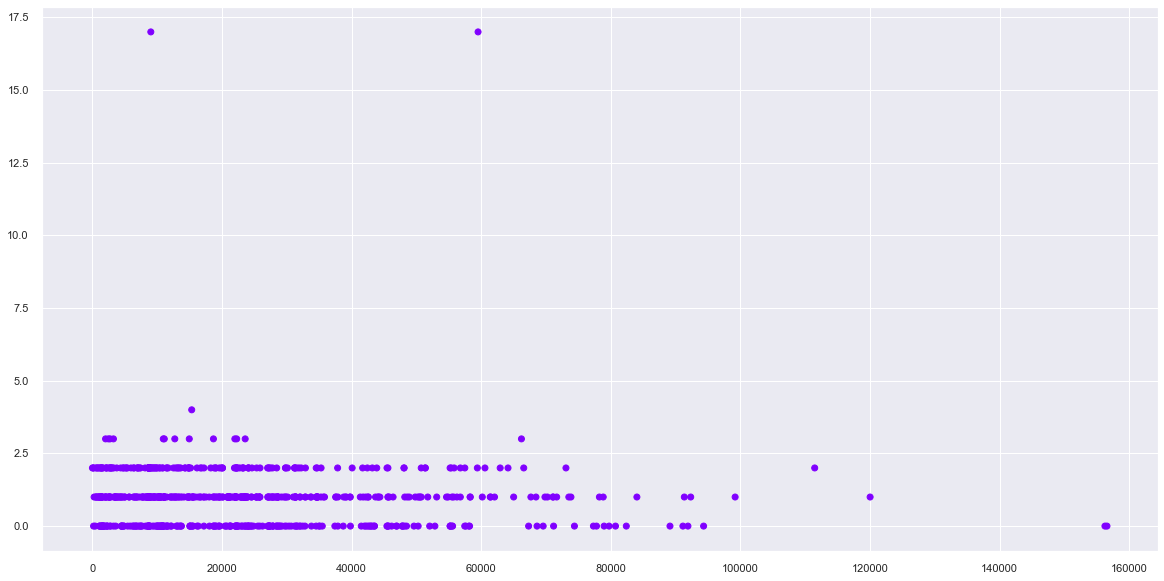

In [211]:
plt.scatter(df_manager_c0['actorId'], df_manager_c0['completed']['course_id'], c=df_manager_c0['cluster'], cmap='rainbow')

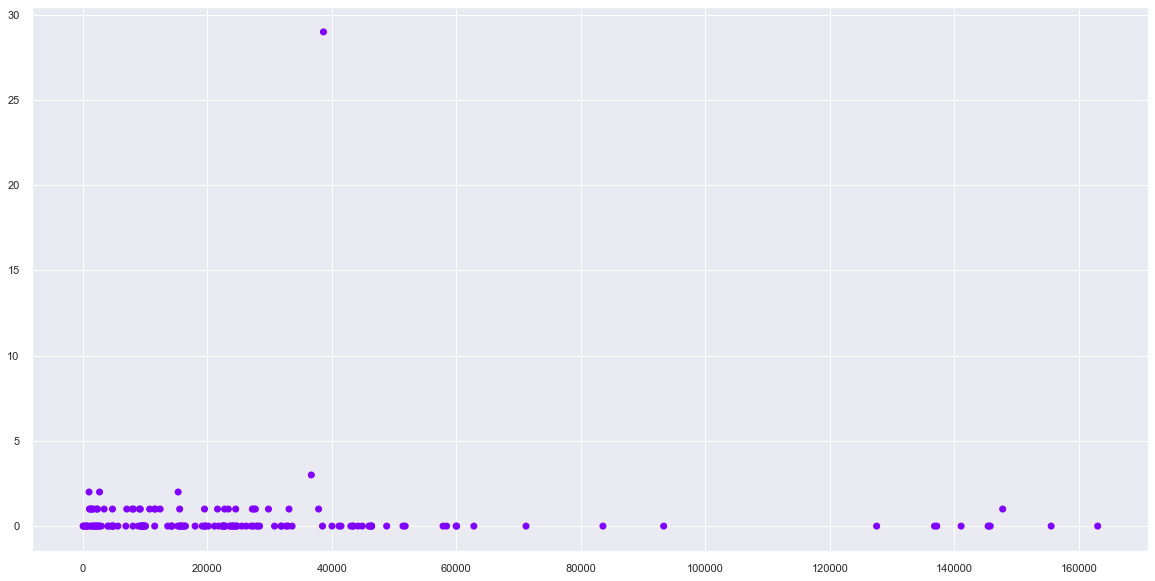

In [212]:
plt.scatter(df_manager_c1['actorId'], df_manager_c1['completed']['course_id'], c=df_manager_c1['cluster'], cmap='rainbow')

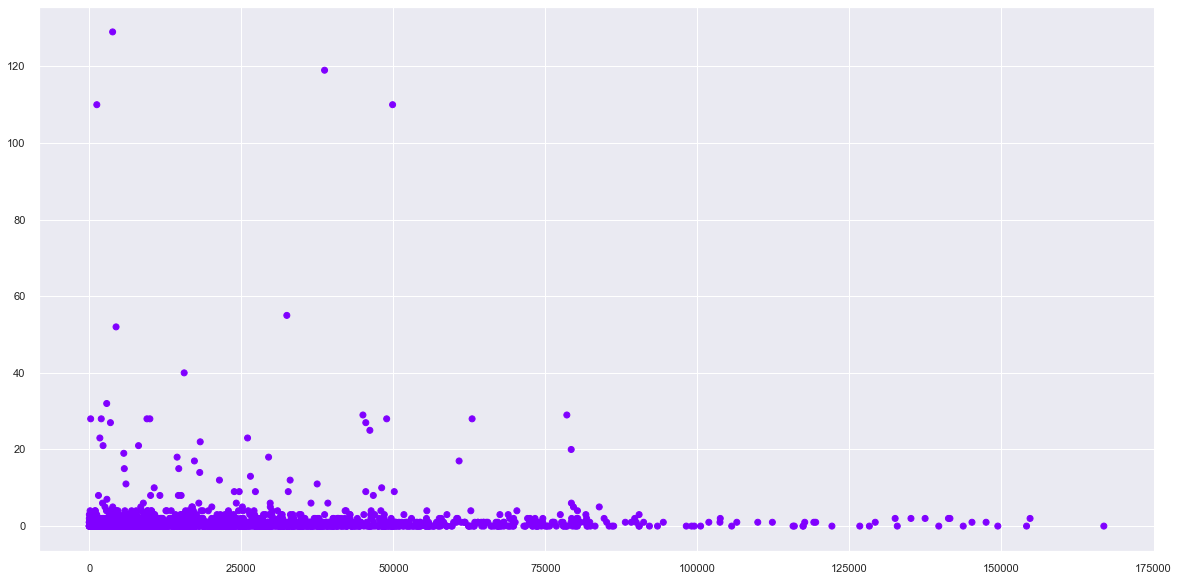

In [213]:
plt.scatter(df_manager_c2['actorId'], df_manager_c2['completed']['course_id'], c=df_manager_c2['cluster'], cmap='rainbow')


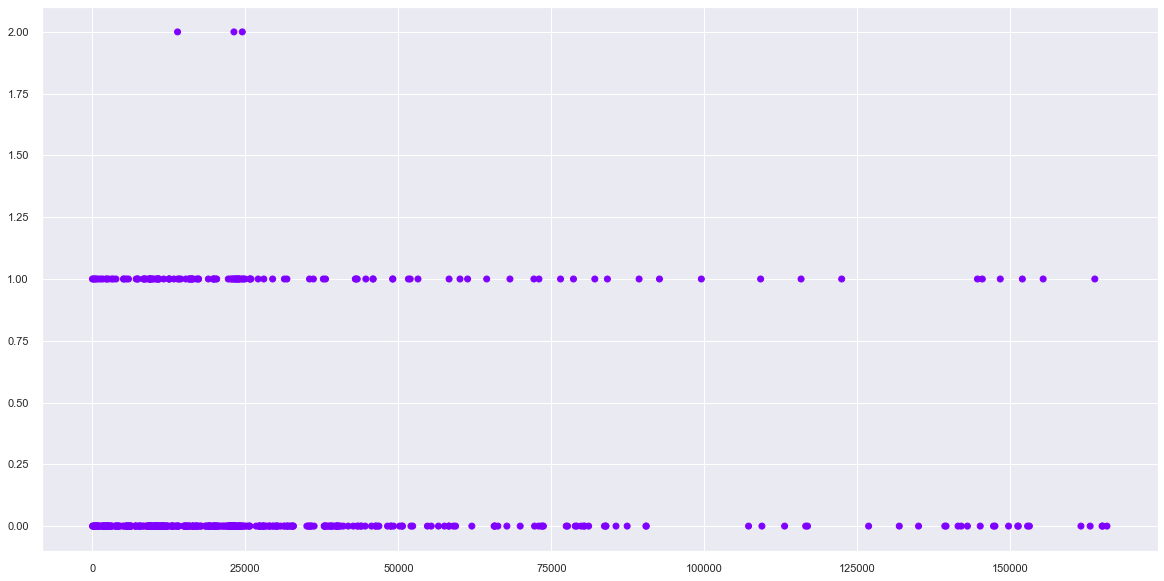

In [214]:
plt.scatter(df_manager_c3['actorId'], df_manager_c3['completed']['course_id'], c=df_manager_c3['cluster'], cmap='rainbow')

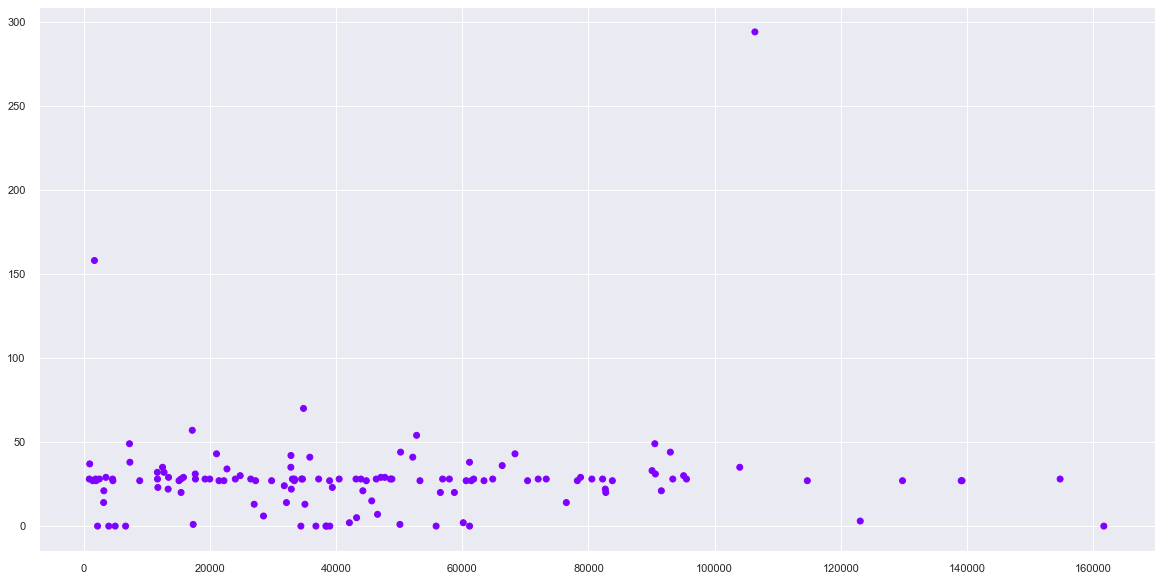

In [215]:
plt.scatter(df_manager_c4['actorId'], df_manager_c4['completed']['course_id'], c=df_manager_c4['cluster'], cmap='rainbow')

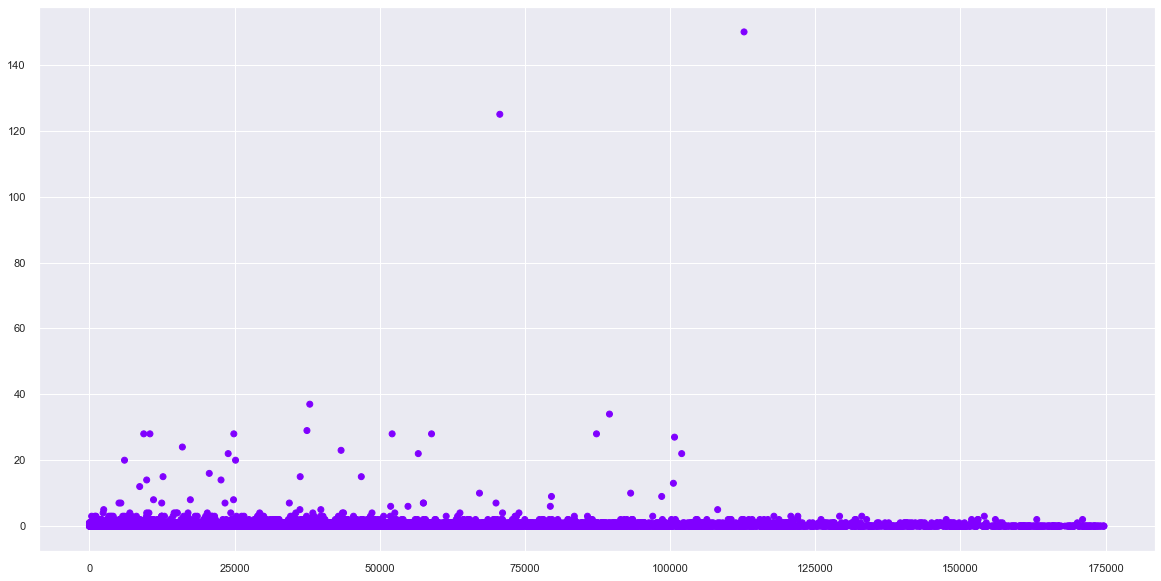

In [216]:
plt.scatter(df_manager_c5['actorId'], df_manager_c5['completed']['course_id'], c=df_manager_c5['cluster'], cmap='rainbow')

## Verb Only

In [17]:
df_manager_verb = coles_df_manager[['actorId', 'verb']]
print(df_manager_verb)

          actorId         verb
0               0    completed
1               1    completed
2               2    completed
3               3    completed
4               4    completed
...           ...          ...
33892235     1596  experienced
33892236     1533  experienced
33892238    23257    completed
33892241    11218  experienced
33892242    11218  experienced

[8819762 rows x 2 columns]


In [21]:
# Verb count 

verb_count = df_manager_verb['verb'].value_counts()

verb_count_list = verb_count[verb_count > 1000].index.tolist()

# Filter data by verb list 
df_manager_filtered = df_manager_verb[df_manager_verb['verb'].isin(verb_count_list)]
print(df_manager_filtered)

          actorId         verb
0               0    completed
1               1    completed
2               2    completed
3               3    completed
4               4    completed
...           ...          ...
33892235     1596  experienced
33892236     1533  experienced
33892238    23257    completed
33892241    11218  experienced
33892242    11218  experienced

[8819353 rows x 2 columns]


In [23]:
df_manager_filtered['verb'].value_counts()

experienced     4919632
completed       1847653
viewed           674846
searched         656947
rated            231705
assigned         134337
passed            64501
selected          63303
registered        60629
launched          60443
removed           33711
suspended         23700
shared            15217
unregistered      13978
terminated        13300
failed             3076
updated            1263
earned             1112
Name: verb, dtype: int64

In [24]:
df_manager_new = df_manager_filtered
df_manager_new['occurence'] = 1
df_manager_new

/var/folders/bp/dzdq45bs3sgbprpffw5tfsk40000gn/T/ipykernel_21318/4028474135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manager_new['occurence'] = 1


,actorId,verb,occurence
0,0,completed,1
1,1,completed,1
2,2,completed,1
3,3,completed,1
4,4,completed,1
...,...,...,...
33892235,1596,experienced,1
33892236,1533,experienced,1
33892238,23257,completed,1
33892241,11218,experienced,1


In [26]:
# Generate pivot table 

df_manager_pivot = pd.pivot_table(df_manager_new, values='occurence', index = 'actorId', columns = 'verb', aggfunc='count')

# Convert pivot table to dataframe 
df_manager_pivot = df_manager_pivot.reset_index()

# Remove index headere
df_manager_pivot = df_manager_pivot.rename_axis(None, axis = 1)

# Replace NaN with 0 for an entire dataframe
df_manager_pivot = df_manager_pivot.replace(np.nan, 0)

df_manager_pivot

,actorId,assigned,completed,earned,experienced,failed,launched,passed,rated,registered,removed,searched,selected,shared,suspended,terminated,unregistered,updated,viewed
0,0,37.0,145.0,0.0,848.0,1.0,12.0,17.0,32.0,19.0,3.0,135.0,1.0,0.0,12.0,0.0,0.0,0.0,136.0
1,1,34.0,367.0,0.0,830.0,0.0,2.0,4.0,42.0,3.0,2.0,31.0,0.0,0.0,1.0,0.0,1.0,0.0,31.0
2,2,16.0,413.0,0.0,1139.0,0.0,4.0,3.0,14.0,4.0,1.0,48.0,8.0,14.0,0.0,0.0,0.0,0.0,50.0
3,3,23.0,512.0,0.0,1064.0,0.0,12.0,32.0,48.0,7.0,3.0,71.0,0.0,0.0,29.0,0.0,5.0,0.0,71.0
4,4,5.0,482.0,0.0,1894.0,4.0,25.0,19.0,34.0,13.0,3.0,310.0,0.0,2.0,12.0,3.0,5.0,0.0,310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12756,174196,0.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12757,174449,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12758,174633,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12759,174678,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Remove actorId 

df_manager_pivot = df_manager_pivot.loc[:, df_manager_pivot.columns != 'actorId']
df_manager_pivot

,assigned,completed,earned,experienced,failed,launched,passed,rated,registered,removed,searched,selected,shared,suspended,terminated,unregistered,updated,viewed
0,37.0,145.0,0.0,848.0,1.0,12.0,17.0,32.0,19.0,3.0,135.0,1.0,0.0,12.0,0.0,0.0,0.0,136.0
1,34.0,367.0,0.0,830.0,0.0,2.0,4.0,42.0,3.0,2.0,31.0,0.0,0.0,1.0,0.0,1.0,0.0,31.0
2,16.0,413.0,0.0,1139.0,0.0,4.0,3.0,14.0,4.0,1.0,48.0,8.0,14.0,0.0,0.0,0.0,0.0,50.0
3,23.0,512.0,0.0,1064.0,0.0,12.0,32.0,48.0,7.0,3.0,71.0,0.0,0.0,29.0,0.0,5.0,0.0,71.0
4,5.0,482.0,0.0,1894.0,4.0,25.0,19.0,34.0,13.0,3.0,310.0,0.0,2.0,12.0,3.0,5.0,0.0,310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12756,0.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12757,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12758,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12759,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Create scaled dataframe 

df_manager_scaled = StandardScaler().fit_transform(df_manager_pivot)
df_manager_scaled

array([[ 6.99756470e-01,  1.55073963e-03, -2.04498472e-01, ...,
        -3.49549105e-01, -1.83262249e-01,  1.23404366e+00],
       [ 6.20457503e-01,  1.63348069e+00, -2.04498472e-01, ...,
        -3.04336286e-02, -1.83262249e-01, -3.24907239e-01],
       [ 1.44663703e-01,  1.97162834e+00, -2.04498472e-01, ...,
        -3.49549105e-01, -1.83262249e-01, -4.28113616e-02],
       ...,
       [-2.78264120e-01, -1.06434946e+00, -2.04498472e-01, ...,
        -3.49549105e-01, -1.83262249e-01, -7.85168934e-01],
       [-2.78264120e-01, -1.05699842e+00, -2.04498472e-01, ...,
        -3.49549105e-01, -1.83262249e-01, -7.85168934e-01],
       [-2.78264120e-01, -1.06434946e+00, -2.04498472e-01, ...,
        -3.49549105e-01, -1.83262249e-01, -7.85168934e-01]])

### Modelling

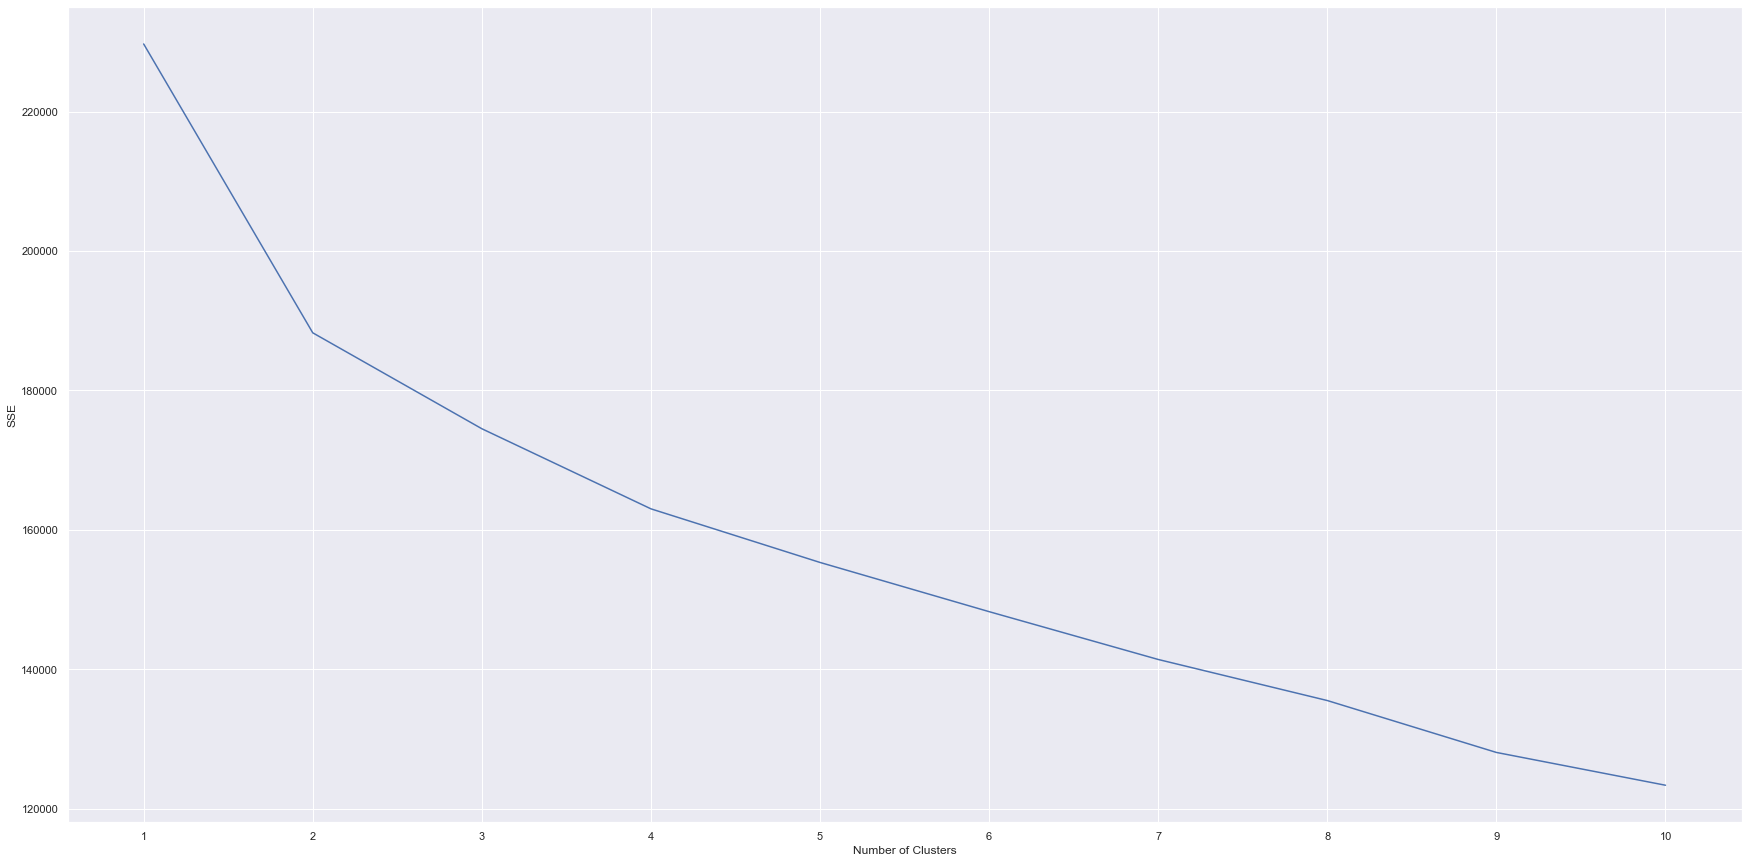

In [34]:
# Initialise k-means parameters

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 1
}

# Create list to hold SSE values for each k 
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_manager_scaled)
    sse.append(kmeans.inertia_)

# Visualise results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [35]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

### Perform K-Means Clustering with Optimal K 

In [43]:
# Instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init = "random", n_clusters=4, n_init=10, random_state=1)

# Fit K-means algorithm to data
kmeans.fit(df_manager_scaled)

# View cluster assignments for each observation 
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [44]:
# Append cluster assignments to original dataframe

df_manager_cat = df_manager_pivot
df_manager_cat['cluster'] = kmeans.labels_

df_manager_cat

,assigned,completed,earned,experienced,failed,launched,passed,rated,registered,removed,searched,selected,shared,suspended,terminated,unregistered,updated,viewed,cluster
0,37.0,145.0,0.0,848.0,1.0,12.0,17.0,32.0,19.0,3.0,135.0,1.0,0.0,12.0,0.0,0.0,0.0,136.0,2
1,34.0,367.0,0.0,830.0,0.0,2.0,4.0,42.0,3.0,2.0,31.0,0.0,0.0,1.0,0.0,1.0,0.0,31.0,2
2,16.0,413.0,0.0,1139.0,0.0,4.0,3.0,14.0,4.0,1.0,48.0,8.0,14.0,0.0,0.0,0.0,0.0,50.0,2
3,23.0,512.0,0.0,1064.0,0.0,12.0,32.0,48.0,7.0,3.0,71.0,0.0,0.0,29.0,0.0,5.0,0.0,71.0,0
4,5.0,482.0,0.0,1894.0,4.0,25.0,19.0,34.0,13.0,3.0,310.0,0.0,2.0,12.0,3.0,5.0,0.0,310.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12756,0.0,1.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12757,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12758,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12759,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [47]:
df_manager_c0 = df_manager_cat[df_manager_cat['cluster'] == 0]
df_manager_c1 = df_manager_cat[df_manager_cat['cluster'] == 1]
df_manager_c2 = df_manager_cat[df_manager_cat['cluster'] == 2]
df_manager_c3 = df_manager_cat[df_manager_cat['cluster'] == 3]

In [48]:
df_manager_c0.describe()

,assigned,completed,earned,experienced,failed,launched,passed,rated,registered,removed,searched,selected,shared,suspended,terminated,unregistered,updated,viewed,cluster
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.0
mean,67.789308,314.414046,0.008386,1284.258910,0.472746,15.700210,21.312369,38.667715,17.073375,12.034591,190.113208,17.392034,8.125786,13.501048,1.983229,4.947589,0.287212,195.055556,0.0
std,103.006192,156.282668,0.144624,870.578021,2.499064,13.025855,19.025496,43.251475,12.387791,32.223444,111.309820,38.611925,23.665093,13.579215,6.032418,7.833349,1.019899,113.669603,0.0
min,0.000000,30.000000,0.000000,51.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.0
25%,5.000000,183.500000,0.000000,756.000000,0.000000,8.000000,9.000000,3.000000,9.000000,1.000000,118.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,122.000000,0.0
50%,36.000000,314.000000,0.000000,1096.000000,0.000000,12.000000,17.000000,26.000000,14.000000,3.000000,170.500000,6.000000,0.000000,12.000000,0.000000,2.000000,0.000000,176.000000,0.0
75%,91.000000,415.000000,0.000000,1557.750000,0.000000,19.000000,28.000000,60.000000,22.000000,9.000000,241.000000,20.750000,5.000000,17.000000,2.000000,6.000000,0.000000,246.750000,0.0
max,1432.000000,1055.000000,3.000000,9071.000000,66.000000,153.000000,248.000000,283.000000,85.000000,558.000000,1424.000000,819.000000,306.000000,61.000000,98.000000,79.000000,11.000000,1470.000000,0.0


In [49]:
df_manager_c1.describe()

,assigned,completed,earned,experienced,failed,launched,passed,rated,registered,removed,searched,selected,shared,suspended,terminated,unregistered,updated,viewed,cluster
count,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.000000,7297.0
mean,1.673290,70.903659,0.011786,154.988763,0.084829,1.651775,1.902015,7.888310,1.789777,1.315883,17.320543,1.748938,0.211183,0.326024,0.613951,0.345347,0.045909,17.849527,1.0
std,8.230382,75.648125,0.107928,172.401116,0.595176,2.536255,3.240348,12.252707,2.296352,2.600736,19.651937,4.956362,1.702986,1.275797,2.196223,1.076802,0.321391,19.934998,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,16.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
50%,0.000000,47.000000,0.000000,91.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,1.0
75%,0.000000,99.000000,0.000000,226.000000,0.000000,2.000000,2.000000,10.000000,3.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,1.0
max,195.000000,440.000000,1.000000,1581.000000,18.000000,30.000000,62.000000,98.000000,21.000000,100.000000,132.000000,95.000000,54.000000,33.000000,40.000000,20.000000,8.000000,132.000000,1.0


In [50]:
df_manager_c2.describe()

,assigned,completed,earned,experienced,failed,launched,passed,rated,registered,removed,searched,selected,shared,suspended,terminated,unregistered,updated,viewed,cluster
count,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.000000,4019.0
mean,14.187858,237.111968,0.002488,563.579746,0.491416,7.485942,6.085345,30.296840,7.535954,2.947748,84.467280,7.620304,1.453347,1.752924,1.487435,1.509331,0.138592,86.502613,2.0
std,30.968357,129.050946,0.049826,367.843606,2.231414,6.942091,7.270972,35.241903,5.305771,5.451013,47.081526,14.869756,5.853998,3.844788,4.004108,2.896867,0.628628,47.441989,0.0
min,0.000000,6.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,0.000000,133.500000,0.000000,300.000000,0.000000,3.000000,2.000000,2.000000,4.000000,1.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,2.0
50%,1.000000,212.000000,0.000000,496.000000,0.000000,6.000000,3.000000,18.000000,6.000000,2.000000,77.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,2.0
75%,15.000000,336.000000,0.000000,740.000000,0.000000,10.000000,8.000000,47.000000,10.000000,2.000000,109.000000,9.000000,0.000000,1.000000,1.000000,2.000000,0.000000,112.000000,2.0
max,483.000000,1090.000000,1.000000,4137.000000,42.000000,78.000000,102.000000,278.000000,53.000000,108.000000,359.000000,165.000000,100.000000,32.000000,53.000000,34.000000,8.000000,362.000000,2.0


In [51]:
df_manager_c3.describe()

,assigned,completed,earned,experienced,failed,launched,passed,rated,registered,removed,searched,selected,shared,suspended,terminated,unregistered,updated,viewed,cluster
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.0
mean,0.885947,157.566191,2.052953,607.879837,0.063136,6.773931,11.879837,31.551935,2.024440,1.590631,19.790224,6.767821,0.169043,2.843177,1.934827,1.368635,0.197556,22.120163,3.0
std,3.184020,72.629569,0.683065,335.117914,0.401636,8.166120,6.180270,33.918914,2.727676,1.325355,26.127138,13.020042,0.906855,1.247794,4.411468,3.401163,0.812953,28.083618,0.0
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,0.000000,106.000000,2.000000,382.000000,0.000000,2.000000,9.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,3.0
50%,0.000000,153.000000,2.000000,548.000000,0.000000,4.000000,11.000000,18.000000,1.000000,1.000000,12.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,13.000000,3.0
75%,0.000000,211.000000,3.000000,759.500000,0.000000,9.000000,13.000000,61.000000,3.000000,2.000000,27.500000,7.000000,0.000000,3.000000,1.000000,2.000000,0.000000,31.000000,3.0
max,24.000000,479.000000,4.000000,2342.000000,5.000000,66.000000,68.000000,143.000000,17.000000,17.000000,238.000000,123.000000,10.000000,10.000000,41.000000,56.000000,9.000000,239.000000,3.0
